# Import the dataset and explore the data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
sns.set()

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFE

#scalers
from sklearn.preprocessing import MinMaxScaler

# embedded methods
from sklearn.linear_model import LassoCV

from sklearn.metrics import confusion_matrix

In [7]:
#First Hearing Date: blank means no hearing yet, can we input? I think not
#Agreement Reached: Can't input
#WCB Decision: Can't input

#test data don't have Agreement Reached, WCB Decision and Claim Injury Type (this one make sense)

In [8]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')
#what does this warning mean?

C:\Users\lopes\AppData\Local\Temp\ipykernel_4276\2079802078.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train_data.csv')


In [9]:
pd.set_option('display.max_columns', None) #to display all columns
train_data.head()
#Claim Identifier: should be the first column
#Claim Injury Type: should be the last column
#line 3 just have the claim identifier and assemble date, we should delete it

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [10]:
train_data.shape

(593471, 33)

In [11]:
train_data.info()
#OIICS Nature of Injury Description: no data
#IME-4 Count: Few info, just for who has an attorney? maybe we should delete for modeling purposes
#C-3 Date: very few values 1/5 of the data

#Industry Code, WCIO Cause of Injury Code, WCIO Nature of Injury Code and WCIO Part Of Body Code should be categorical
#Agreement Reached, Age at Injury, Birth Year and Number of Dependents should be int?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [12]:
train_data.describe()

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
count,574026.000000,5.453750e+05,544948.000000,5.934710e+05,132803.000000,564068.000000,0.0,558386.000000,558369.000000,556944.000000,574026.000000,574026.000000
mean,42.114270,4.910883e+02,1886.767604,2.366760e+07,3.207337,58.645305,NaN,54.381143,41.013839,39.738146,0.046665,3.006559
std,14.256432,6.092918e+03,414.644423,1.079271e+08,2.832303,19.644175,NaN,25.874281,22.207521,22.365940,0.210921,2.000801
min,0.000000,0.000000e+00,0.000000,5.393066e+06,1.000000,11.000000,NaN,1.000000,1.000000,-9.000000,0.000000,0.000000
25%,31.000000,0.000000e+00,1965.000000,5.593414e+06,1.000000,45.000000,NaN,31.000000,16.000000,33.000000,0.000000,1.000000
50%,42.000000,0.000000e+00,1977.000000,5.791212e+06,2.000000,61.000000,NaN,56.000000,49.000000,38.000000,0.000000,3.000000
75%,54.000000,8.410000e+02,1989.000000,5.991000e+06,4.000000,71.000000,NaN,75.000000,52.000000,53.000000,0.000000,5.000000
max,117.000000,2.828079e+06,2018.000000,9.998917e+08,73.000000,92.000000,NaN,99.000000,91.000000,99.000000,1.000000,6.000000


In [13]:
train_data.describe(include=['object'])

,Accident Date,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Description,WCIO Nature of Injury Description,WCIO Part Of Body Description,Zip Code,WCB Decision
count,570337,574026,593471,574026,559466,187245,574026,574026,574026,574026,574026,574026,150798,574026,564068,574026,558386,558369,556944,545389,574026
unique,5539,3,1096,2,2475,1648,2046,8,8,63,2,8,1094,4,20,5,74,56,54,10060,1
top,2020-03-01,N,2020-03-06,N,2021-05-11,2021-04-21,STATE INSURANCE FUND,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,NYC,2022-04-15,M,HEALTH CARE AND SOCIAL ASSISTANCE,IV,LIFTING,STRAIN OR TEAR,LOWER BACK AREA,11236,Not Work Related
freq,1245,571412,1422,392291,1847,350,111144,285368,291078,60430,546505,270779,440,335218,114339,265981,46610,153373,51862,3302,574026


In [14]:
columns_name = train_data.columns
columns_name

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'OIICS Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents'],
      dtype='object')

In [15]:
for i in columns_name:
    print(i)
    print(train_data[i].unique())
    print(train_data[i].value_counts())
    print('\n')
#Age at Injury: if it's a workplace it means ages like 5 or 9 don't make sense, we should delete them
#Alternative Dispute Resolution: what the values mean? ['N' nan 'Y' 'U']
#Average Weekly Wage: make sense they don't receive money?
#Birth Year: with a lot of 0.0
#Claim Identifier: 292668076 is repeated
#Gender: what is 'U' or 'X'?
#WCIO Part Of Body Code: -9 is an error?
#Zip Code: 'G9B0Y' is an error?
#WCB Decision: just 'Not Work Related' and 'nan'? maybe we can delete this column

#maybe 0.0 it's a nan, some values we don't have, but exists
#Carrier Type: we have a lot of UNKNOW, so maybe we can conclude 0.0 or nothing mean missing values

Accident Date
['2019-12-30' '2019-08-30' '2019-12-06' ... '2000-05-24' '2007-05-01'
 '1980-05-17']
Accident Date
2020-03-01    1245
2020-12-18    1001
2022-02-07     977
2022-01-05     883
2021-02-18     851
              ... 
2017-05-17       1
2015-05-28       1
2002-08-18       1
2017-09-01       1
1980-05-17       1
Name: count, Length: 5539, dtype: int64


Age at Injury
[ 31.  46.  40.  nan  61.  67.  48.  33.  55.  20.  21.  51.  62.  35.
  54.  32.  34.  38.  30.  36.  39.  44.  56.  29.  60.  49.  50.  18.
  58.  24.  45.  53.  52.  47.  25.  23.  22.  64.  70.  41.  69.  57.
  27.  42.  77.  72.  19.  28.  63.  65.  59.  43.  26.  74.  66.  76.
  68.  37.   0.  16.  71.  82.  75.  17.  78.  73.  89.  85.  84.  81.
  87.  80.  11.  88.  79.  15.  83.  86.  90.   1.  10. 102.  94. 117.
  14. 113.  95.  92. 104.   5.   8. 115. 110.  91.  96.  99.  12.  13.
  93. 101.   7. 111.   9.  97. 112. 109. 100.  98. 114.]
Age at Injury
31.0     14041
30.0     14022
32.0     13994
29.0     

In [16]:
train_data.isna().sum()

Accident Date                          23134
Age at Injury                          19445
Alternative Dispute Resolution         19445
Assembly Date                              0
Attorney/Representative                19445
Average Weekly Wage                    48096
Birth Year                             48523
C-2 Date                               34005
C-3 Date                              406226
Carrier Name                           19445
Carrier Type                           19445
Claim Identifier                           0
Claim Injury Type                      19445
County of Injury                       19445
COVID-19 Indicator                     19445
District Name                          19445
First Hearing Date                    442673
Gender                                 19445
IME-4 Count                           460668
Industry Code                          29403
Industry Code Description              29403
Medical Fee Region                     19445
OIICS Natu

In [17]:
""" corr_matrix = train_df[numerical_cols + ['Claim Injury Type Num']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show() """

' corr_matrix = train_df[numerical_cols + [\'Claim Injury Type Num\']].corr()\n\nplt.figure(figsize=(12, 8))\nsns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=\'coolwarm\')\nplt.title(\'Correlation Matrix\')\nplt.show() '

# Clean and pre-process the dataset

In [18]:
train_data.shape[0] #number of rows, the same as Claim Identifier

593471

In [19]:
train_data.set_index('Claim Identifier', inplace=True) #set Claim Identifier as index

In [20]:
train_data.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
957648180,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [21]:
train_data[train_data.index == 292668076] #to delete, no info and duplicate

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
292668076,NaN,NaN,NaN,2021-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292668076,NaN,NaN,NaN,2022-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
train_data.drop(292668076, inplace=True) #delete the rows
train_data.drop(['OIICS Nature of Injury Description', 'WCB Decision', 'C-3 Date', 'First Hearing Date', 'IME-4 Count'], axis=1, inplace=True) #delete the column, just nan values or one value
train_data = train_data[(train_data['Age at Injury'] >= 16) & (train_data['Age at Injury'] <= 70)] #can't work if they are younger than 16
train_data.dropna(subset=['Claim Injury Type'], inplace=True) #delete the rows with missing values in Claim Injury Type
train_data.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,Gender,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,M,44.0,RETAIL TRADE,I,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,F,23.0,CONSTRUCTION,I,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,M,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,6.0
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,DUTCHESS,N,ALBANY,M,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,1.0
5393863,2019-12-26,67.0,N,2020-01-01,N,0.00,1952.0,2019-12-31,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,3. MED ONLY,SUFFOLK,N,HAUPPAUGE,M,44.0,RETAIL TRADE,IV,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0.0,5.0


In [23]:
train_data['WCIO Part Of Body Code'] = train_data['WCIO Part Of Body Code'].apply(lambda x: abs(x) if x < 0 else x)

In [24]:
float_to_object = ['Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code']
train_data[float_to_object] = train_data[float_to_object].astype(str)
train_data.dtypes

Accident Date                         object
Age at Injury                        float64
Alternative Dispute Resolution        object
Assembly Date                         object
Attorney/Representative               object
Average Weekly Wage                  float64
Birth Year                           float64
C-2 Date                              object
Carrier Name                          object
Carrier Type                          object
Claim Injury Type                     object
County of Injury                      object
COVID-19 Indicator                    object
District Name                         object
Gender                                object
Industry Code                         object
Industry Code Description             object
Medical Fee Region                    object
WCIO Cause of Injury Code             object
WCIO Cause of Injury Description      object
WCIO Nature of Injury Code            object
WCIO Nature of Injury Description     object
WCIO Part 

In [25]:
train_data.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,Gender,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,M,44.0,RETAIL TRADE,I,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,F,23.0,CONSTRUCTION,I,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,M,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,6.0
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,DUTCHESS,N,ALBANY,M,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,1.0
5393863,2019-12-26,67.0,N,2020-01-01,N,0.00,1952.0,2019-12-31,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,3. MED ONLY,SUFFOLK,N,HAUPPAUGE,M,44.0,RETAIL TRADE,IV,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0.0,5.0


In [26]:
train_data.duplicated().sum() #no duplicates

0

In [27]:
pd.reset_option('display.max_columns')

In [28]:
#classifiy them as Non-US residents
train_data['Zip Code'] = train_data['Zip Code'].apply(
    lambda x: x[:2] if isinstance(x, str) and len(x) == 5 and x.isdigit() else ('Non-US Resident' if pd.notna(x) else np.nan)
)

In [29]:
#zip codes that start with 1 come from NY state - where the data set is based
# we decide to divide those that are from NY from those that even though are US residents, are not from NY
train_data['Zip Code'] = np.where(
    (train_data['Zip Code'] != 'Unknown') & 
    (train_data['Zip Code'] != 'Non-US Resident') & 
    train_data['Zip Code'].notna() & 
    train_data['Zip Code'].str.startswith('1'), 
    'NY Resident', 
    np.where(
        (train_data['Zip Code'] != 'Unknown') & 
        (train_data['Zip Code'] != 'Non-US Resident') & 
        train_data['Zip Code'].notna(), 
        'non-NY US Residents', 
        train_data['Zip Code']
    )
)

In [30]:
train_data['Zip Code'].unique()

array(['NY Resident', 'non-NY US Residents', nan, 'Non-US Resident'],
      dtype=object)

In [31]:
X = train_data.drop('Claim Injury Type', axis = 1)
y = train_data['Claim Injury Type']

In [32]:
X_train, X_val,y_train, y_val = train_test_split(X,y,
                                                train_size = 0.7,
                                                random_state=0,
                                                shuffle = True, 
                                                stratify = y)

In [33]:
#For train
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)

#For Validation
X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

## Outliers

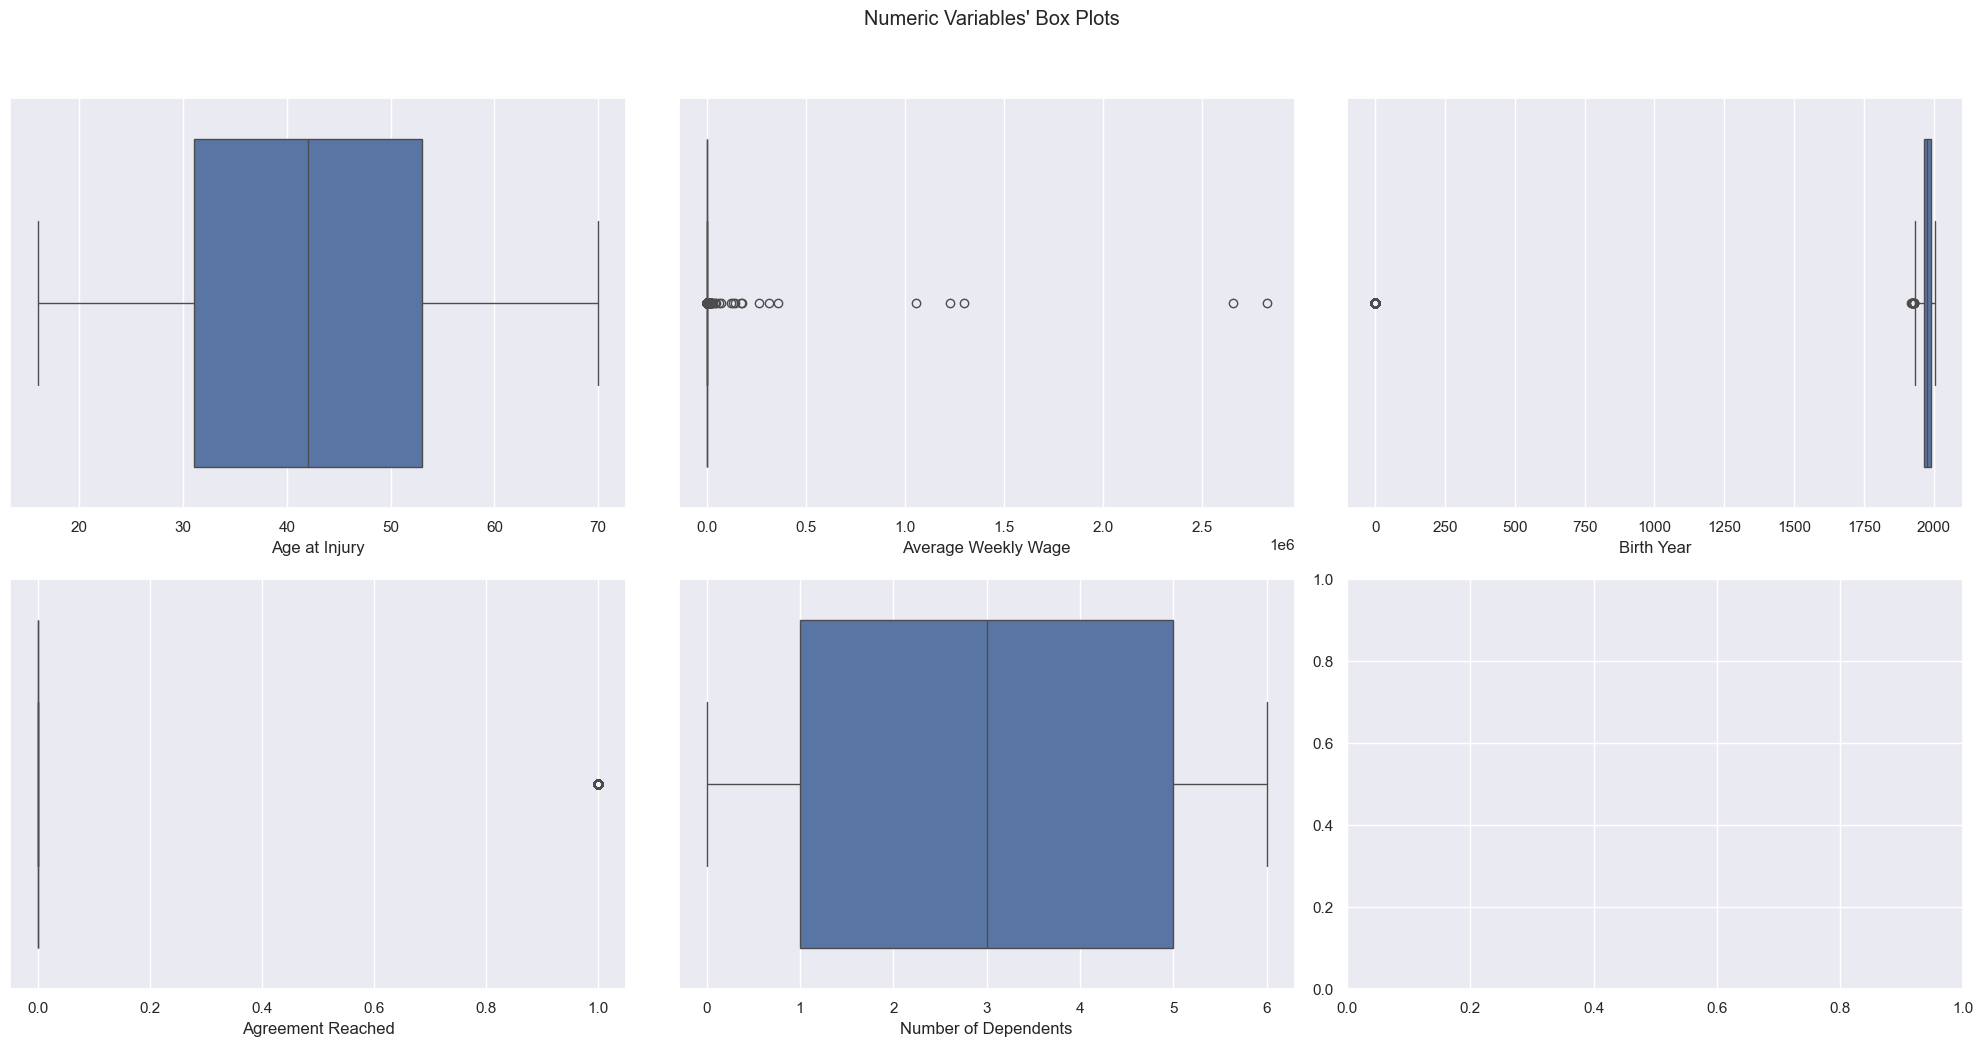

In [34]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(X_train_num.columns) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), X_train_num.columns): # Notice the zip() function and flatten() method
    sns.boxplot(x=X_train_num[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

Age at injury: all good

Average Weekly Wage: very strange

Birth Year: value 0 is a outlier, going to drop it

Agreement reach: just 0 or 1 values, no outliers

Number of dependents: all good

In [35]:
X_train_num[X_train_num['Birth Year'] == 0] #make sense so many? deleting this column because we have Age at Injury

,Age at Injury,Average Weekly Wage,Birth Year,Agreement Reached,Number of Dependents
Claim Identifier,,,,,
5801293,27.0,0.00,0.0,0.0,6.0
5661330,34.0,0.00,0.0,0.0,2.0
6126377,50.0,0.00,0.0,0.0,2.0
5574159,37.0,716.92,0.0,0.0,2.0
5843827,55.0,682.44,0.0,0.0,1.0
...,...,...,...,...,...
5538107,35.0,NaN,0.0,0.0,5.0
6111557,51.0,0.00,0.0,0.0,6.0
5629321,19.0,0.00,0.0,0.0,3.0


In [36]:
X_train_num.drop('Birth Year', axis=1, inplace=True)
X_val_num.drop('Birth Year', axis=1, inplace=True)

In [37]:
not_voluntary_train = X_train_num[X_train_num['Average Weekly Wage'] != 0]
not_voluntary_val = X_val_num[X_val_num['Average Weekly Wage'] != 0]

1/3 are non-voluntary, so the majority is voluntary

Decided to consider outlier just the outliers of the non-voluntary workers, using the formula below

In [38]:
# Function to calculate IQR and identify outliers for a specific column
def identify_outliers_iqr_column(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers

# Identify outliers for the 'Average Weekly Wage' column
outliers_train = identify_outliers_iqr_column(not_voluntary_train, 'Average Weekly Wage')
outliers_val = identify_outliers_iqr_column(not_voluntary_val, 'Average Weekly Wage')

# Align the index of the outliers Series with X_train_num
outliers_aligned_train = outliers_train.reindex(X_train_num.index, fill_value=False)
outliers_aligned_val = outliers_val.reindex(X_val_num.index, fill_value=False)

# Print the number of outliers in the 'Average Weekly Wage' column
print(f"Number of outliers in 'Average Weekly Wage': {outliers_train.sum()}")
print(f"Number of outliers in 'Average Weekly Wage': {outliers_val.sum()}")

# Remove outliers from the 'Average Weekly Wage' column
X_train_num_cleaned = X_train_num[~outliers_aligned_train]
X_val_num_cleaned = X_val_num[~outliers_aligned_val]

# Verify the cleaned DataFrame
print(X_train_num.shape)
print(X_train_num_cleaned.shape)
print(X_val_num.shape)
print(X_val_num_cleaned.shape)

Number of outliers in 'Average Weekly Wage': 4165
Number of outliers in 'Average Weekly Wage': 1760
(393008, 4)
(388843, 4)
(168432, 4)
(166672, 4)


In [39]:
""" sns.set()

for i in X_train_cat.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=X_train_cat[i].value_counts().index, y=X_train_cat[i].value_counts().values)
    plt.title(f'Bar Plot of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show() """

" sns.set()\n\nfor i in X_train_cat.columns:\n    plt.figure(figsize=(10, 6))\n    sns.barplot(x=X_train_cat[i].value_counts().index, y=X_train_cat[i].value_counts().values)\n    plt.title(f'Bar Plot of {i}')\n    plt.xlabel(i)\n    plt.ylabel('Frequency')\n    plt.show() "

o que fazer, por exemplo, com Gender? Balancear os dados?

In [40]:
#filling with median
for column in X_train_num.columns:
        if column == 'Agreement Reached':
                mode_value = X_train_num[column].mode()[0]
                X_train_num[column] = X_train_num[column].fillna(mode_value)
                X_val_num[column] = X_val_num[column].fillna(mode_value)
        else:
                median_to_fill = X_train_num[column].median()
                X_train_num[column] = X_train_num[column].fillna(median_to_fill)
                X_val_num[column] = X_val_num[column].fillna(median_to_fill)

#filling with Unknown
for column in X_train_cat.columns:
    X_train_cat[column] = X_train_cat[column].fillna('Unknown')
    X_val_cat[column] = X_val_cat[column].fillna('Unknown')

Alternative Dispute Resolution what 'U' mean?

In [41]:
#call function
scaler = MinMaxScaler()

#fit to training data
scaler.fit(X_train_num)

#transform the data
X_train_num_scaled = scaler.transform(X_train_num) # this will return an array

#show results
X_train_num_scaled

array([[9.81481481e-01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.11111111e-01, 0.00000000e+00, 0.00000000e+00, 3.33333333e-01],
       [2.59259259e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.51851852e-01, 5.30395367e-04, 0.00000000e+00, 1.00000000e+00],
       [8.70370370e-01, 0.00000000e+00, 0.00000000e+00, 3.33333333e-01],
       [4.62962963e-01, 5.67954431e-04, 0.00000000e+00, 1.00000000e+00]])

In [42]:
# Convert the array to a pandas dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)
X_train_num_scaled

,Age at Injury,Average Weekly Wage,Agreement Reached,Number of Dependents
Claim Identifier,,,,
5468013,0.981481,0.000000,0.0,1.000000
5439570,0.111111,0.000000,0.0,0.333333
5680865,0.259259,0.000000,0.0,0.000000
5751163,0.870370,0.000000,0.0,0.333333
6130453,0.648148,0.000000,0.0,0.833333
...,...,...,...,...
5423620,0.518519,0.000000,0.0,0.500000
5703299,0.759259,0.000000,0.0,0.000000
5787217,0.351852,0.000530,0.0,1.000000


In [43]:
X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)
X_val_num_scaled.head(3)

,Age at Injury,Average Weekly Wage,Agreement Reached,Number of Dependents
Claim Identifier,,,,
5590686,0.537037,0.0,0.0,0.500000
5825402,0.796296,0.0,0.0,0.666667
5454204,0.203704,0.0,0.0,1.000000


# Feature selection

In [44]:
X_train_num_scaled.var() #Average Weekly Wage has a very high variance, we should delete it

Age at Injury           0.060428
Average Weekly Wage     0.000006
Agreement Reached       0.044234
Number of Dependents    0.110994
dtype: float64

In [45]:
X_train_num_scaled.drop('Average Weekly Wage', axis=1, inplace=True)
X_val_num_scaled.drop('Average Weekly Wage', axis=1, inplace=True)

In [46]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

In [47]:
cor_spearman = X_train_num_scaled.corr(method ='spearman')
cor_spearman #Age at Injury and Birth Year are highly correlated, what make a lot of sense, it is the same information, we should delete one of them (Birth Year)

,Age at Injury,Agreement Reached,Number of Dependents
Age at Injury,1.000000,0.021393,-0.000545
Agreement Reached,0.021393,1.000000,-0.000363
Number of Dependents,-0.000545,-0.000363,1.000000


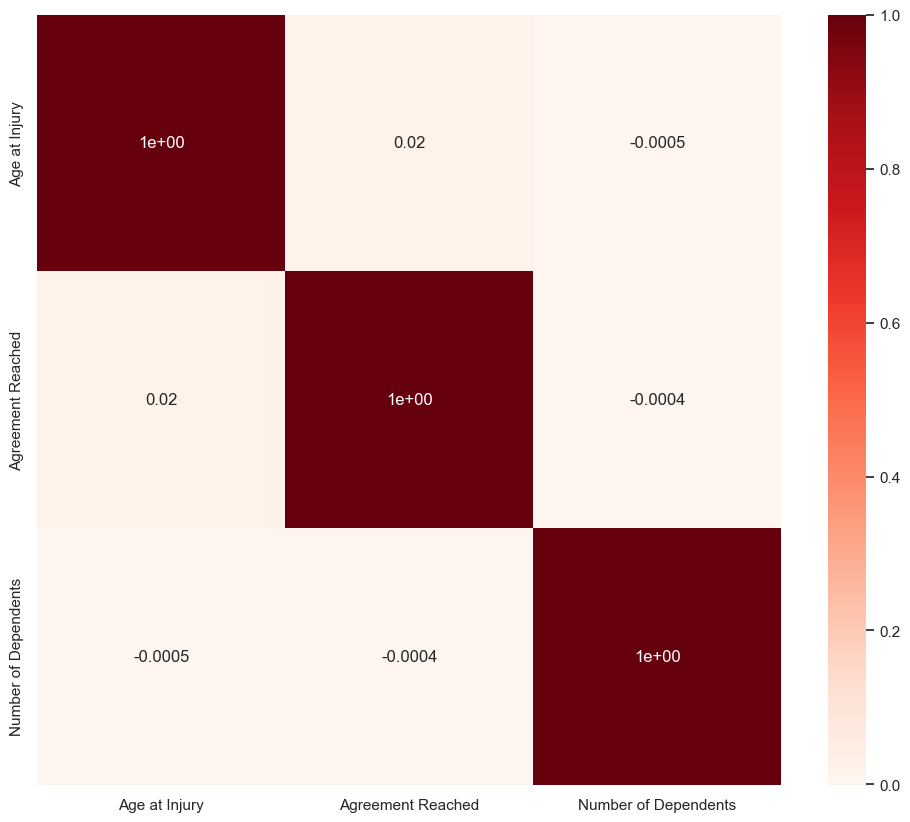

In [48]:
cor_heatmap(cor_spearman)

In [49]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [50]:
for var in X_train_cat:
    TestIndependence(X_train_cat[var],y_train, var)

Accident Date is IMPORTANT for Prediction
Alternative Dispute Resolution is IMPORTANT for Prediction
Assembly Date is IMPORTANT for Prediction
Attorney/Representative is IMPORTANT for Prediction
C-2 Date is IMPORTANT for Prediction
Carrier Name is IMPORTANT for Prediction
Carrier Type is IMPORTANT for Prediction
County of Injury is IMPORTANT for Prediction
COVID-19 Indicator is IMPORTANT for Prediction
District Name is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
Industry Code is IMPORTANT for Prediction
Industry Code Description is IMPORTANT for Prediction
Medical Fee Region is IMPORTANT for Prediction
WCIO Cause of Injury Code is IMPORTANT for Prediction
WCIO Cause of Injury Description is IMPORTANT for Prediction
WCIO Nature of Injury Code is IMPORTANT for Prediction
WCIO Nature of Injury Description is IMPORTANT for Prediction
WCIO Part Of Body Code is IMPORTANT for Prediction
WCIO Part Of Body Description is IMPORTANT for Prediction
Zip Code is IMPORTANT for Predict

In [51]:
""" # first join all the training data
all_train = X_train.join(y_train)


def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()
    
bar_charts_categorical(all_train, "Gender", "Claim Injury Type") """

' # first join all the training data\nall_train = X_train.join(y_train)\n\n\ndef bar_charts_categorical(df, feature, target):\n    cont_tab = pd.crosstab(df[feature], df[target], margins = True)\n    categories = cont_tab.index[:-1]\n        \n    fig = plt.figure(figsize=(15, 5))\n    \n    plt.subplot(121)\n    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")\n    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")\n    plt.legend((p2[0], p1[0]), (\'$y_i=1$\', \'$y_i=0$\'))\n    plt.title("Frequency bar chart")\n    plt.xlabel(feature)\n    plt.ylabel("$Frequency$")\n\n    # auxiliary data for 122\n    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), \n                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])\n      \n    plt.subplot(122)\n    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")\n    p2 = plt.bar(cat

In [52]:
X_train_cat.shape[1], X_train_num_scaled.shape[1]

(21, 3)

In [53]:
""" #no of features
nof_list=np.arange(1,4)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression(max_iter=1000)
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score)) """

KeyboardInterrupt: 

In [54]:
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator = model, n_features_to_select = 3)
X_rfe = rfe.fit_transform(X = X_train_num_scaled, y = y_train)
X_train_num_scaled.columns

Index(['Age at Injury', 'Agreement Reached', 'Number of Dependents'], dtype='object')

In [55]:
rfe.support_

array([ True,  True,  True])

In [56]:
rfe.ranking_

array([1, 1, 1])

In [57]:
selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features

Age at Injury           True
Agreement Reached       True
Number of Dependents    True
dtype: bool

ValueError: x and y must have same first dimension, but have shapes (3,) and (0,)

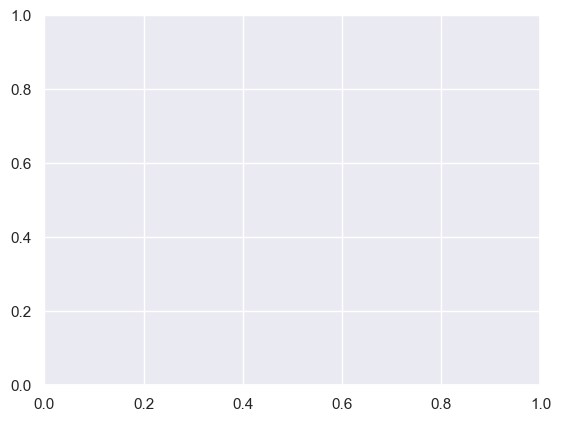

In [58]:
""" plt.plot(list(range(1,4)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,4)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show() """

In [ ]:
""" #no of features
nof_list=np.arange(1,4)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    #call support vector machines classifier
    model = SVC(kernel = 'linear')
    
    #create RFE instance
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    
    #fit and transform for training data, transform for val data
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score > high_score):
        high_score = val_score
        nof = nof_list[n]
        
        #adding mention of variables to keep
        features_to_select = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print(f"Features to select: \n{features_to_select}") """

In [1]:
""" plt.plot(list(range(1,4)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,4)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show() """

NameError: name 'plt' is not defined

In [59]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [60]:
reg = LassoCV()
reg.fit(X_train_num_scaled, y_train)
coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)
coef

ValueError: could not convert string to float: '2. NON-COMP'

In [241]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

' print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables") '

In [242]:
coef.sort_values()

' coef.sort_values() '

In [243]:
plot_importance(coef,'Lasso')

" plot_importance(coef,'Lasso') "

# Build a simple model and assess the performance

In [61]:
dt = DecisionTreeClassifier().fit(X_train_num_scaled, y_train)
preds_train = dt.predict(X_train_num_scaled)
preds_val = dt.predict(X_val_num_scaled)

In [62]:
print(dt.score(X_train_num_scaled, y_train))
print(dt.score(X_val_num_scaled, y_val))

0.5519938525424419
0.5515935214211076


In [63]:
print(confusion_matrix(y_train, preds_train))
print(confusion_matrix(y_val, preds_val))

[[     0   7427      0      4      0      0      0      0]
 [     0 199232      0      0      0      0      0      0]
 [     0  47474      0      0      0      0      0      0]
 [     0  84535      0  17706      0      0      0      0]
 [     0  33163      0    222      0      0      0      0]
 [     0   2639      0    257      0      0      0      0]
 [     0     55      0     10      0      0      0      0]
 [     0    253      0     31      0      0      0      0]]
[[    0  3185     0     0     0     0     0     0]
 [    0 85385     0     0     0     0     0     0]
 [    0 20346     0     0     0     0     0     0]
 [    0 36297     0  7521     0     0     0     0]
 [    0 14217     0    91     0     0     0     0]
 [    0  1120     0   121     0     0     0     0]
 [    0    25     0     2     0     0     0     0]
 [    0   109     0    13     0     0     0     0]]


In [247]:
""" drugs_2classify['DrugPlant'] = dt.predict(drugs_2classify)
drugs_2classify

#export test data predictions
drugs_2classify['DrugPlant'].to_csv('Exercise1_predictions.csv') """

" drugs_2classify['DrugPlant'] = dt.predict(drugs_2classify)\ndrugs_2classify\n\n#export test data predictions\ndrugs_2classify['DrugPlant'].to_csv('Exercise1_predictions.csv') "